In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [5]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'flow switch', 'flow meter',
       'turbidity', 'ORP', 'PH', 'TDS', 'Pressure in tank', 'Pressure in',
       'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder', 'ph_feeder',
       'Fresh water', 'Shw msg', 'Drain', 'Human Counter', 'temperature',
       'water level', 'cppm', 'phfeedtime', 'orpfeedtime',
       'bather in from mens', 'bather in from ladies'],
      dtype='object')

We want to remove some the columns we know aren't necessary.

The following columns are deprecated from the client:
- `flow switch`
- `flow meter`
- `Pressure in tank`
- `Shw msg`
- `phfeedtime`
- `orpfeedtime`

In [7]:
deprecated_col = ['flow switch', 'flow meter', 'Pressure in tank', 'Shw msg', 'phfeedtime', 'orpfeedtime']

df = df.drop(deprecated_col, axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,Pump RPM,...,dis_feeder,ph_feeder,Fresh water,Drain,Human Counter,temperature,water level,cppm,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN


Lets tidy up our data. `cppm` is calculated from ORP and thus is not necessary. We also do not have data for `bather in from mens` and `bather in from ladies`. We will remove these as well then look at missing values.

In [8]:
unnecessary_data = ['cppm', 'bather in from mens', 'bather in from ladies']

df = df.drop(unnecessary_data, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder',
       'ph_feeder', 'Fresh water', 'Drain', 'Human Counter', 'temperature',
       'water level'],
      dtype='object')

In [9]:
df.isna().sum()

pool_id              0
time_stamp           0
salinity            31
turbidity           31
ORP                  0
PH                   0
TDS                 31
Pressure in         31
Pressure out        31
Pump RPM         43635
pump current        31
dis_feeder       43635
ph_feeder        43635
Fresh water         31
Drain               31
Human Counter       31
temperature          0
water level         31
dtype: int64

In [10]:
len(df)

43635

Comparing our missing data and the len of the dataframe, we see that the columns `Pump RPM`, `dis_feeder`, and `ph_feeder` are completely empty. We will drop those columns.

In [11]:
empty_col = ['Pump RPM', 'dis_feeder', 'ph_feeder']

df = df.drop(empty_col, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'pump current', 'Fresh water', 'Drain',
       'Human Counter', 'temperature', 'water level'],
      dtype='object')

In [12]:
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


In [13]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], utc=True) #Convert to timestamp dtype through UTC
df['time_stamp'] = df['time_stamp'].dt.tz_convert('Canada/Eastern') #Convert back to Canadian Eastern time
df['time_stamp'] = df['time_stamp'].dt.tz_localize(None) #Remove localization information

In [14]:
df['time_stamp'] 

0       2022-11-01 11:01:16.220
1       2022-11-01 11:01:26.323
2       2022-11-01 11:01:36.386
3       2022-11-01 11:01:46.498
4       2022-11-01 11:01:56.554
                  ...          
43630   2022-11-01 11:00:26.794
43631   2022-11-01 11:00:36.852
43632   2022-11-01 11:00:46.971
43633   2022-11-01 11:00:56.031
43634   2022-11-01 11:01:06.155
Name: time_stamp, Length: 43635, dtype: datetime64[ns]

In [15]:
df = df.sort_values(by='time_stamp')
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39668,10001,2022-11-01 00:00:06.605,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39669,10001,2022-11-01 00:00:16.661,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39670,10001,2022-11-01 00:00:26.768,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39671,10001,2022-11-01 00:00:36.834,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39672,10001,2022-11-01 00:00:46.936,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


Today, we're going to focus on creating an alert each time our pH is out of scope. Oour ideal range is 7.2-7.8 pH with a target of 7.6. Lets start by plotting out our pH and seeing where it stands.

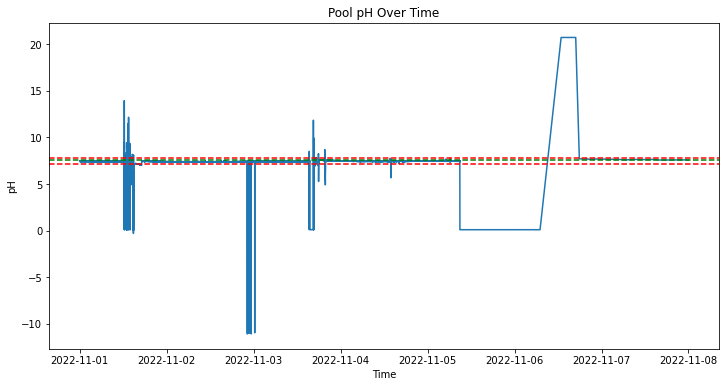

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['time_stamp'], df['PH'])
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('Pool pH Over Time')
ax.axhline(y=7.2, linestyle='--',color='red')
ax.axhline(y=7.8, linestyle='--',color='red')
ax.axhline(y=7.6, linestyle='--',color='green')

In [34]:
def ph_warning(time, data, pool_id):
    df = data
    
    try:
        df.set_index('time_stamp', inplace=True)
    except KeyError:
        pass
    
    pool = df[df['pool_id'] == pool_id]
    ph = pool.loc[time]['PH']
    print(f'pH for pool {pool_id} is currently {ph[0]}')
    
    if ph[0] >= 7.8:
        print('pH too basic, take immediate action')
    elif ph[0] <= 7.2:
        print('pH too acidic, take immediate action')
    elif ph[0] < 7.5:
        print('pH becoming acidic, consider taking action')
    elif ph[0] > 7.65:
        print('pH becoming basic, consider taking action')
    else:
        print('pH is okay')
        
    ph_minutes(time, pool)

In [40]:
def ph_minutes(time, data):
    df = data
    time = pd.to_datetime(time)
    
    df_time = df.loc[time-pd.Timedelta("2 minutes"): time]
    print(df_time)
    df_time.plot(x='PH')
    

pH for pool 10001 is currently 7.43028
pH becoming acidic, consider taking action
                         pool_id  salinity  turbidity      ORP       PH  \
time_stamp                                                                
2022-11-01 00:00:06.605    10001   285.584    6.53613  788.607  7.46826   
2022-11-01 00:00:16.661    10001   285.638    6.37939  788.879  7.46067   
2022-11-01 00:00:26.768    10001   285.855    5.75244  788.336  7.42585   
2022-11-01 00:00:36.834    10001   285.855    5.59570  788.065  7.43408   
2022-11-01 00:00:46.936    10001   285.765    5.59570  788.879  7.43345   
2022-11-01 00:00:56.996    10001   286.036    5.12549  788.698  7.43345   
2022-11-01 00:01:06.101    10001   286.090    5.28223  788.517  7.42965   
2022-11-01 00:01:16.160    10001   286.036    5.12549  788.607  7.43028   

                             TDS  Pressure in  Pressure out  pump current  \
time_stamp                                                                  
2022-11-01 00

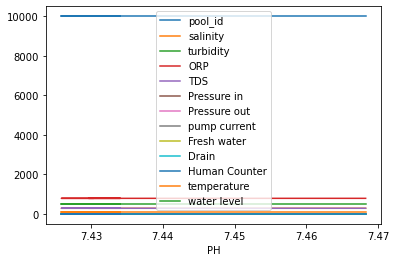

In [41]:
pool_id = 10001

ph_warning('2022-11-01 00:01:16.160', df, pool_id)